In [5]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from tqdm import tqdm

Processing file: D:\Workplace\.SPRING2025\AIL\buzz 1\Test\Swarming\May04_Ngay260223_Bat dau dat 14h27_Chia 14h35_Ket thuc chia 14h59_Tat may 15h05\May04_Ngay260223_Bat dau dat 14h27_Chia 14h35_Ket thuc chia 14h59_Tat may 15h05_16.wav


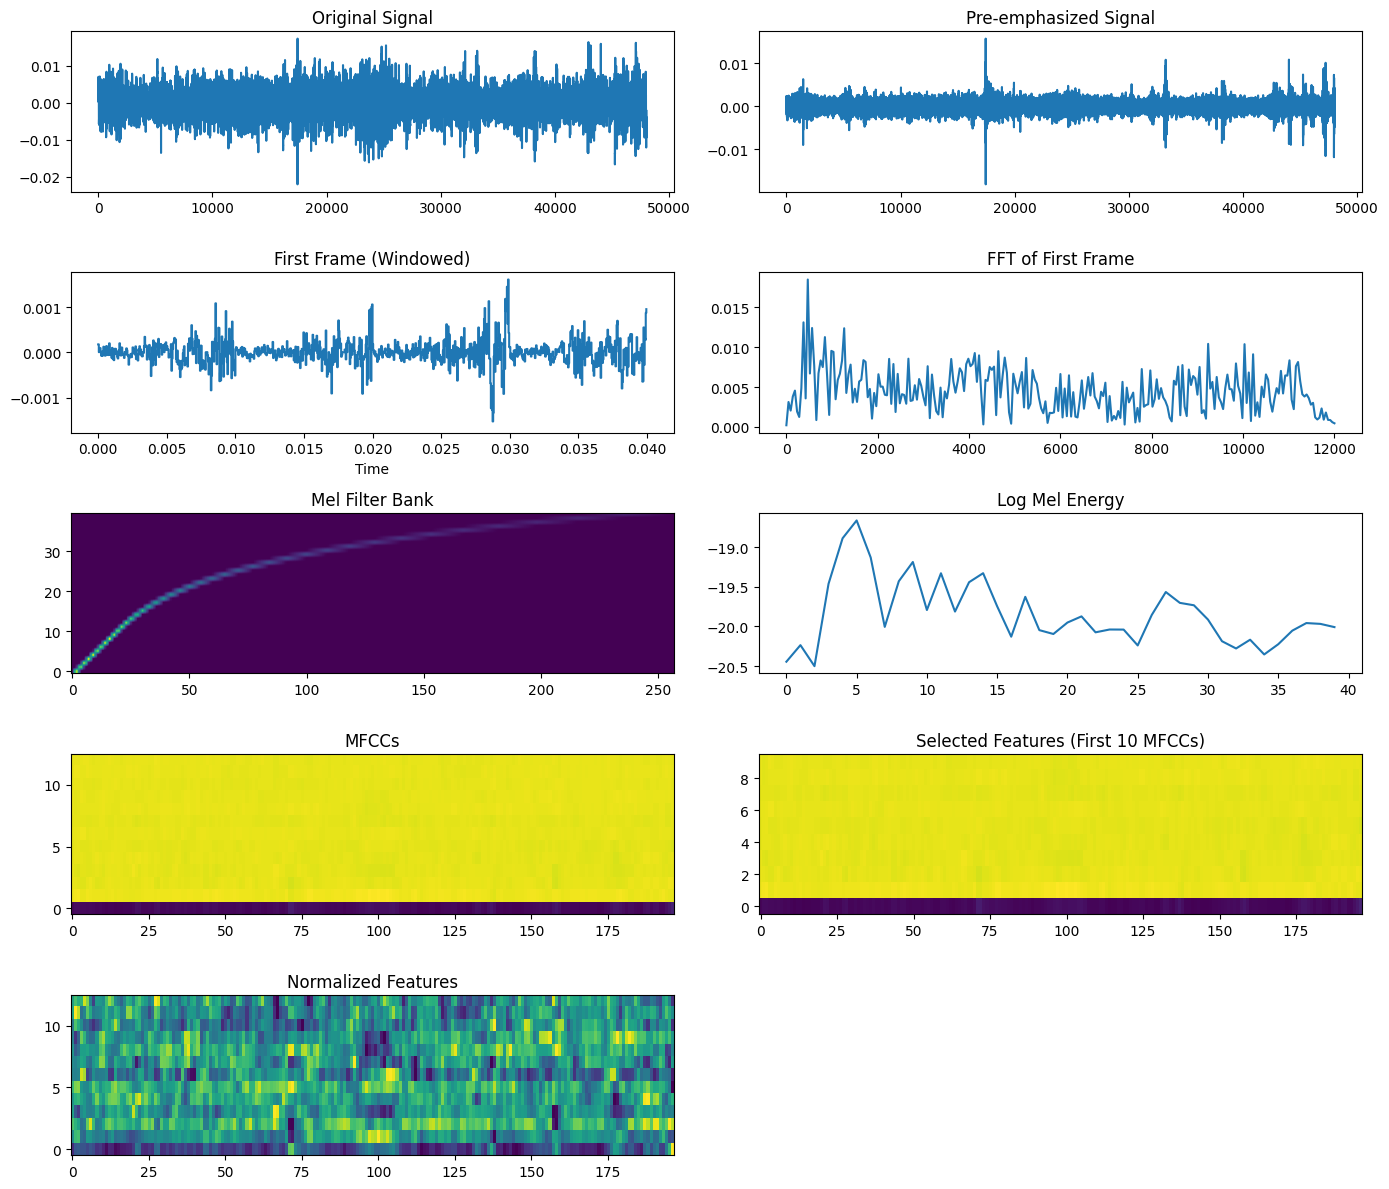

Processing file: D:\Workplace\.SPRING2025\AIL\buzz 1\Test\None_swarming\1626803977012_co chua, sang troi nang nhe, tu 10h55_200721\1626803977012_co chua, sang troi nang nhe, tu 10h55_200721_80.wav


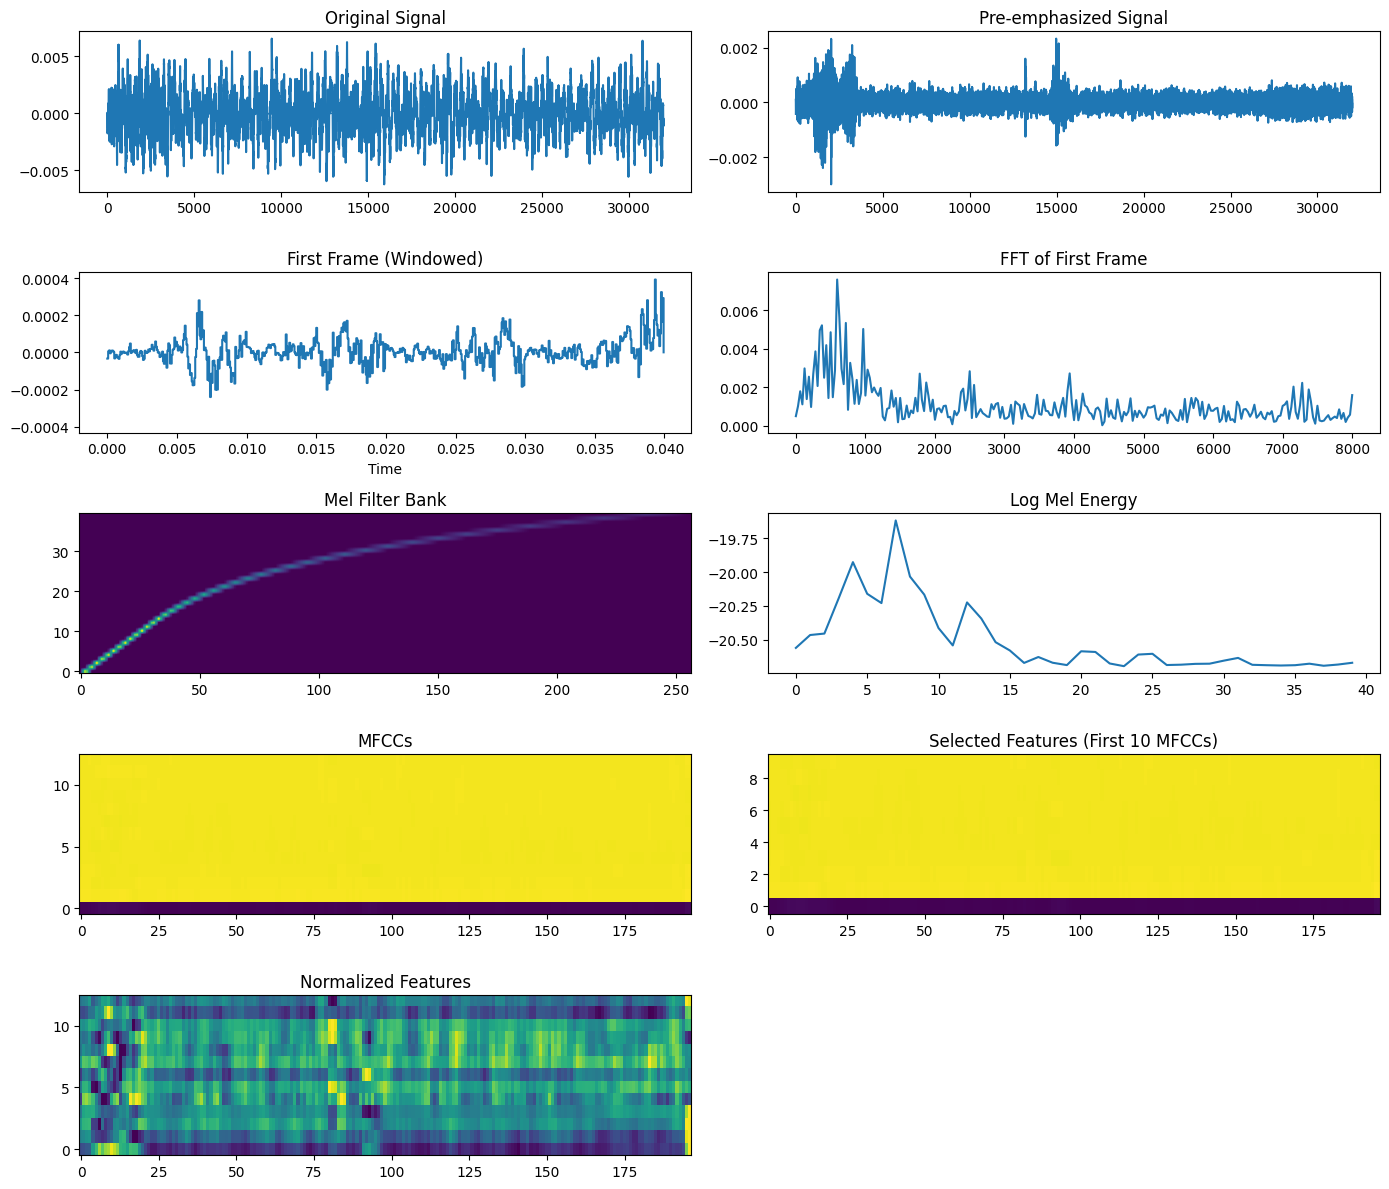

Processing file: D:\Workplace\.SPRING2025\AIL\buzz 2\Test\None_swarming\Qeen_31_05_Co chua\Qeen_31_05_Co chua_18.wav


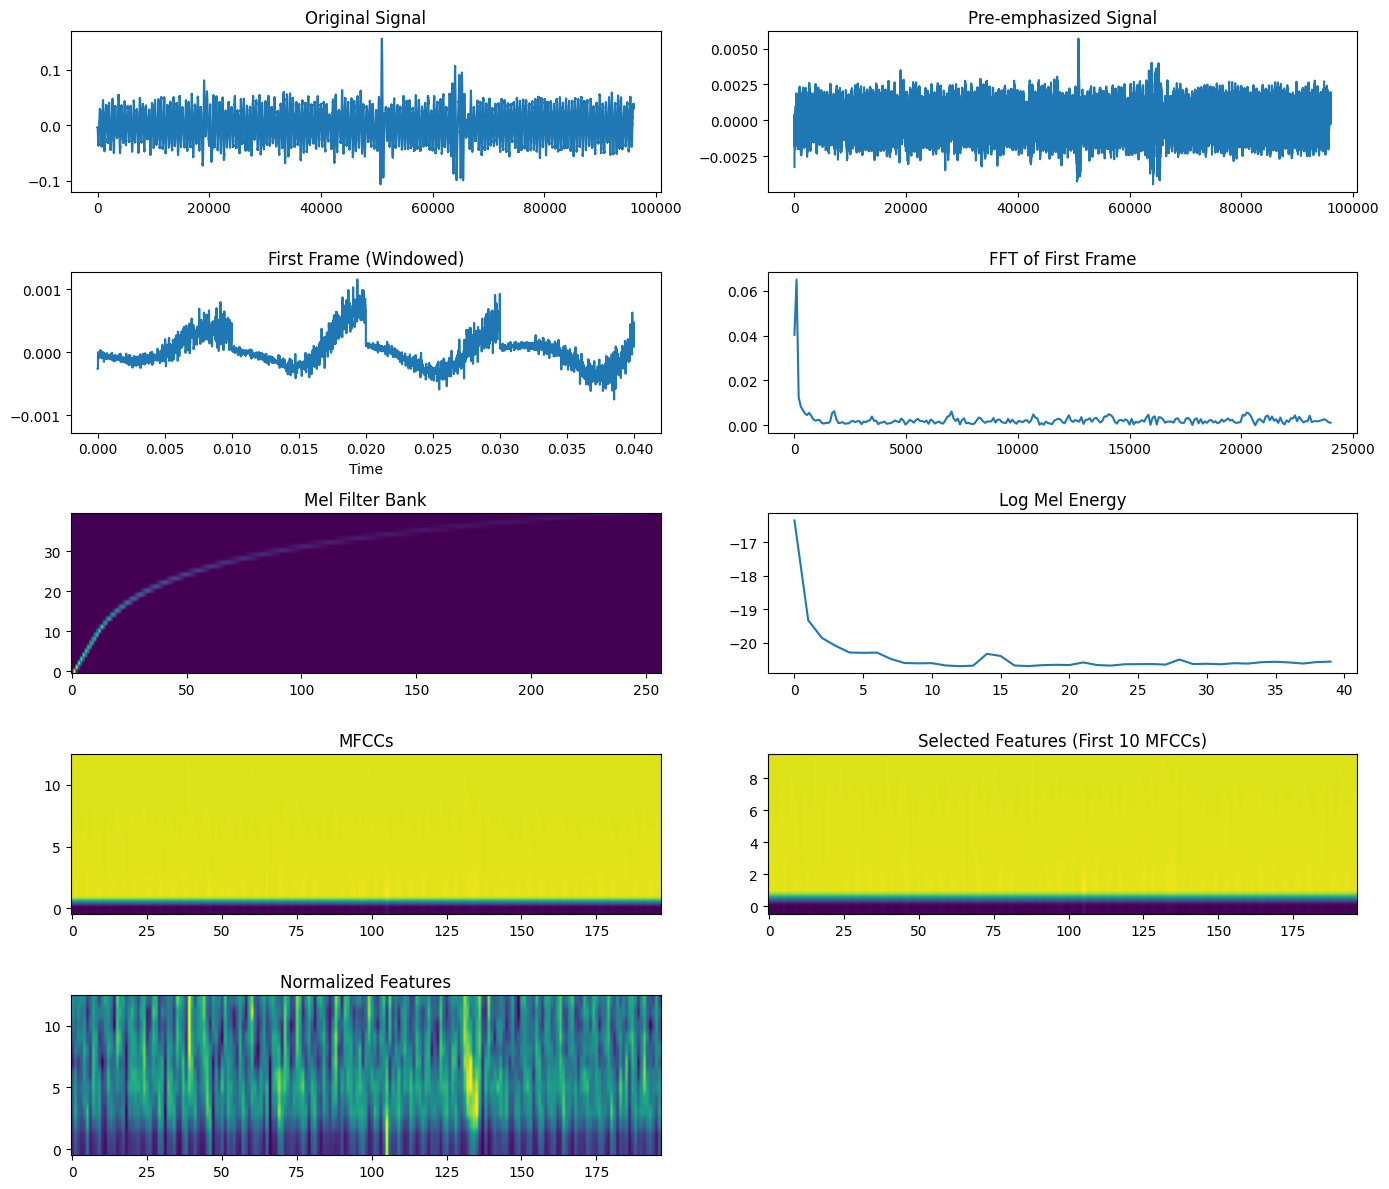

Processing file: D:\Workplace\.SPRING2025\AIL\buzz 2\Test\Swarming\M2_Ngay 21122022_Dat 13h20_ Bay14h_ Ket thuc bay 14h45\M2_Ngay 21122022_Dat 13h20_ Bay14h_ Ket thuc bay 14h45_16.wav


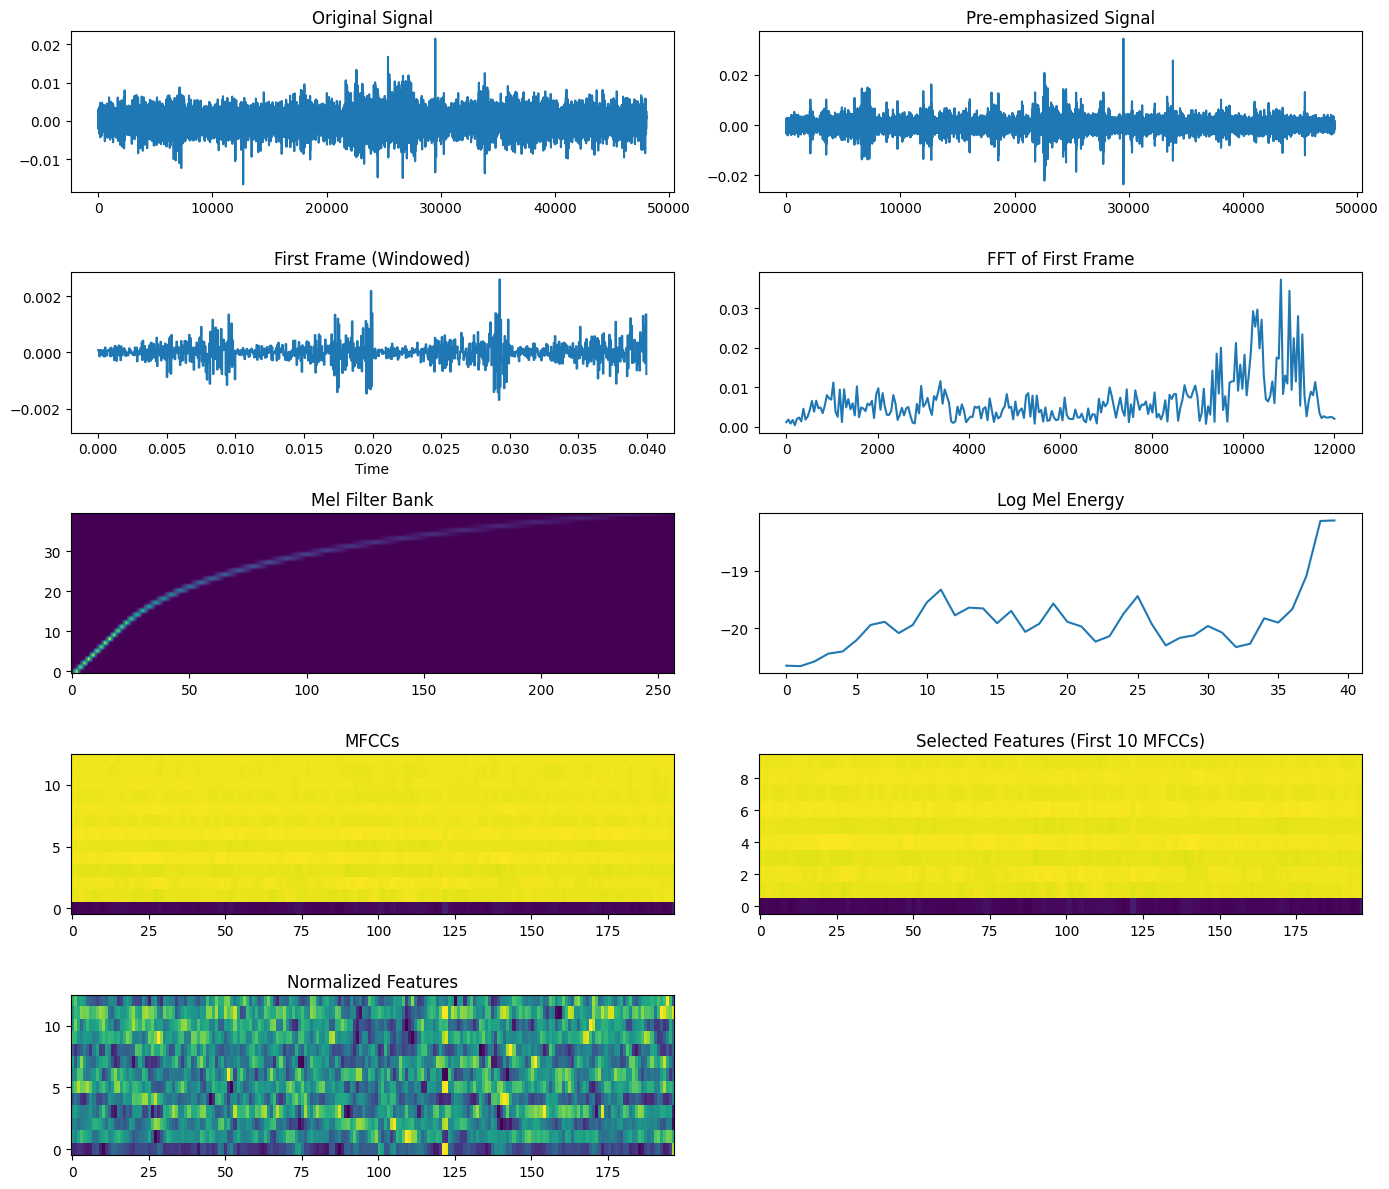

In [ ]:

import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# File paths
file_path_test = [
    r"D:\Workplace\.SPRING2025\AIL\buzz 1\Test\Swarming\May04_Ngay260223_Bat dau dat 14h27_Chia 14h35_Ket thuc chia 14h59_Tat may 15h05\May04_Ngay260223_Bat dau dat 14h27_Chia 14h35_Ket thuc chia 14h59_Tat may 15h05_16.wav",
    r"D:\Workplace\.SPRING2025\AIL\buzz 1\Test\None_swarming\1626803977012_co chua, sang troi nang nhe, tu 10h55_200721\1626803977012_co chua, sang troi nang nhe, tu 10h55_200721_80.wav",
    r"D:\Workplace\.SPRING2025\AIL\buzz 2\Test\None_swarming\Qeen_31_05_Co chua\Qeen_31_05_Co chua_18.wav",
    r"D:\Workplace\.SPRING2025\AIL\buzz 2\Test\Swarming\M2_Ngay 21122022_Dat 13h20_ Bay14h_ Ket thuc bay 14h45\M2_Ngay 21122022_Dat 13h20_ Bay14h_ Ket thuc bay 14h45_16.wav"
]

# Check if files exist and process each file
for file_path in file_path_test:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")

    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)

    print(f"Processing file: {file_path}")

    # Step 1: Pre-emphasis
    pre_emphasis = 0.97
    emphasized_signal = np.append(y[0], y[1:] - pre_emphasis * y[:-1])

    # Step 2: Framing
    frame_size = 0.040
    frame_stride = 0.01
    frame_length = int(frame_size * sr)
    frame_step = int(frame_stride * sr)
    num_frames = int(np.ceil((len(emphasized_signal) - frame_length) / frame_step)) + 1
    padded_signal = np.append(emphasized_signal, np.zeros((num_frames * frame_step + frame_length - len(emphasized_signal))))
    frames = np.lib.stride_tricks.as_strided(padded_signal, 
                                             shape=(num_frames, frame_length), 
                                             strides=(frame_step * padded_signal.strides[0], padded_signal.strides[0]))

    # Step 3: Windowing
    frames *= np.hamming(frame_length)

    # Step 4: FFT and Power Spectrum
    NFFT = 512
    fft_frames = np.fft.rfft(frames, NFFT)
    power_frames = (1.0 / NFFT) * np.square(np.abs(fft_frames))

    # Step 5: Mel Filter Bank
    num_filters = 40
    mel_filter_bank = librosa.filters.mel(sr=sr, n_fft=NFFT, n_mels=num_filters)
    mel_energy = np.dot(power_frames, mel_filter_bank.T)

    # Step 6: Logarithmic Compression
    log_mel_energy = np.log(mel_energy + 1e-9)

    # Step 7: Discrete Cosine Transform (DCT)
    mfccs = librosa.feature.mfcc(S=log_mel_energy.T, sr=sr, n_mfcc=13).T

    # Step 9: Feature Selection (Select first 10 MFCCs)
    selected_features = mfccs[:, :10]

    # Step 10: Feature Normalization (Standardization)
    scaler = MinMaxScaler()
    mfccs_normalized = scaler.fit_transform(mfccs)

    # Visualization
    plt.figure(figsize=(14, 12))

    plt.subplot(5, 2, 1)
    plt.plot(y)
    plt.title("Original Signal")

    plt.subplot(5, 2, 2)
    plt.plot(emphasized_signal)
    plt.title("Pre-emphasized Signal")

    plt.subplot(5, 2, 3)
    librosa.display.waveshow(frames[0], sr=sr)
    plt.title("First Frame (Windowed)")

    plt.subplot(5, 2, 4)
    plt.plot(np.fft.rfftfreq(NFFT, 1/sr), np.abs(fft_frames[0]))
    plt.title("FFT of First Frame")

    plt.subplot(5, 2, 5)
    plt.imshow(mel_filter_bank, aspect='auto', origin='lower')
    plt.title("Mel Filter Bank")

    plt.subplot(5, 2, 6)
    plt.plot(log_mel_energy[0])
    plt.title("Log Mel Energy")

    plt.subplot(5, 2, 7)
    plt.imshow(mfccs.T, aspect='auto', origin='lower')
    plt.title("MFCCs")

    plt.subplot(5, 2, 8)
    plt.imshow(selected_features.T, aspect='auto', origin='lower')
    plt.title("Selected Features (First 10 MFCCs)")

    plt.subplot(5, 2, 9)
    plt.imshow(mfccs_normalized.T, aspect='auto', origin='lower')
    plt.title("Normalized Features")

    plt.tight_layout()
    plt.show()


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
mfccs_normalized = scaler.fit_transform(mfccs)

In [12]:

from tqdm import tqdm
import glob


'\nfrom tqdm import tqdm\nimport glob\n'

In [13]:

def extract_mfcc(file_path, n_mfcc=13):
    try:
        y, sr = librosa.load(file_path, sr=None)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc).mean(axis=1)
        return mfcc
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

def extract_features_from_folder(root_folder, n_mfcc=13):
    all_data = []
    for dirpath, dirnames, filenames in os.walk(root_folder):
        for file in filenames:
            if file.endswith(('.wav', '.mp3')):
                file_path = os.path.join(dirpath, file)
                relative_path = os.path.relpath(file_path, root_folder)
                parts = relative_path.split(os.sep)
                category = parts[0] if len(parts) > 0 else "Unknown"
                subcategory = parts[1] if len(parts) > 1 else "Unknown"

                mfcc = extract_mfcc(file_path, n_mfcc=n_mfcc)
                if mfcc is not None:
                    feature_row = {
                        'file_name': file,
                        'category': category,
                        'subcategory': subcategory,
                        **{f'mfcc_{i}': mfcc[i] for i in range(n_mfcc)}
                    }
                    all_data.append(feature_row)
    return pd.DataFrame(all_data)

if __name__ == "__main__":
    root_folder = r"D:\Workplace\.SPRING2025\AIL\buzz 2"
    output_folder = r"D:\Workplace\.SPRING2025\AIL\mfcc_features_buzz2"

    for subset in ["Test", "Train", "Val"]:
        subset_path = os.path.join(root_folder, subset)
        print(f"Processing {subset_path}...")
        features_df = extract_features_from_folder(subset_path)
        
        output_file = os.path.join(output_folder, f"{subset}_mfcc_features.csv")
        
        # Ensure the output directory exists
        os.makedirs(os.path.dirname(output_file), exist_ok=True)
        
        #Save
        features_df.to_csv(output_file, index=False)
        print(f"Saved features for {subset} to {output_file}")




'\ndef extract_mfcc(file_path, n_mfcc=13):\n    try:\n        y, sr = librosa.load(file_path, sr=None)\n        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc).mean(axis=1)\n        return mfcc\n    except Exception as e:\n        print(f"Error processing {file_path}: {e}")\n        return None\n\ndef extract_features_from_folder(root_folder, n_mfcc=13):\n    all_data = []\n    for dirpath, dirnames, filenames in os.walk(root_folder):\n        for file in filenames:\n            if file.endswith((\'.wav\', \'.mp3\')):\n                file_path = os.path.join(dirpath, file)\n                relative_path = os.path.relpath(file_path, root_folder)\n                parts = relative_path.split(os.sep)\n                category = parts[0] if len(parts) > 0 else "Unknown"\n                subcategory = parts[1] if len(parts) > 1 else "Unknown"\n\n                mfcc = extract_mfcc(file_path, n_mfcc=n_mfcc)\n                if mfcc is not None:\n                    feature_row = {\n  

### 13 feature

In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
from tqdm import tqdm

def extract_mfcc(file_path, n_mfcc=13):
    try:
        y, sr = librosa.load(file_path, sr=16000)
        
        # Apply pre-emphasis
        pre_emphasis = 0.98
        emphasized_signal = np.append(y[0], y[1:] - pre_emphasis * y[:-1])

        # Frame size and stride (in seconds)
        frame_size = 0.025
        frame_stride = 0.01
        frame_length = int(frame_size * sr)
        frame_step = int(frame_stride * sr)
        
        # Number of frames
        num_frames = int(np.ceil((len(emphasized_signal) - frame_length) / frame_step)) + 1

        # Padding the signal
        padded_signal = np.append(emphasized_signal, np.zeros((num_frames * frame_step + frame_length - len(emphasized_signal))))
        
        # Create frames
        frames = np.lib.stride_tricks.as_strided(padded_signal, 
                                                 shape=(num_frames, frame_length), 
                                                 strides=(frame_step * padded_signal.strides[0], padded_signal.strides[0]))
        
        # Apply Hamming window
        frames *= np.hamming(frame_length)
        
        # Perform FFT
        NFFT = 512
        fft_frames = np.fft.rfft(frames, NFFT)
        power_frames = (1.0 / NFFT) * np.square(np.abs(fft_frames))
        
        # Mel filter bank
        num_filters = n_mfcc
        mel_filter_bank = librosa.filters.mel(sr=sr, n_fft=NFFT, n_mels=num_filters)
        mel_energy = np.dot(power_frames, mel_filter_bank.T)
        
        # Logarithm of Mel energy
        log_mel_energy = np.log(mel_energy + 1e-9)
        
        # Compute MFCCs
        mfccs = librosa.feature.mfcc(S=log_mel_energy.T, sr=sr, n_mfcc=n_mfcc).T
        
        return mfccs.mean(axis=0), None
    except Exception as e:
        return None, str(e)

def extract_features_from_folder(root_folder, output_folder, dataset_type, n_mfcc=13):
    all_data = []
    errors = []

    for dirpath, _, filenames in os.walk(root_folder):
        for file in tqdm(filenames, desc=f"Processing {dirpath}", leave=False):
            if file.endswith(('.wav', '.mp3')):
                file_path = os.path.join(dirpath, file)
                relative_path = os.path.relpath(file_path, root_folder)
                parts = relative_path.split(os.sep)

                # Xác định category (Swarming hoặc Non-swarming)
                category = parts[0] if len(parts) > 0 else "Unknown"

                # Ánh xạ category thành label (1: Swarming, 0: Non-swarming)
                label = 1 if category.lower() == "swarming" else 0

                mfcc, error = extract_mfcc(file_path, n_mfcc=n_mfcc)
                if mfcc is not None:
                    feature_row = {
                        'file_name': file,
                        'label': label,
                        **{f'mfcc_{i}': mfcc[i] for i in range(n_mfcc)}
                    }
                    all_data.append(feature_row)
                else:
                    errors.append((file_path, error))

    # Chuyển danh sách thành DataFrame và lưu thành CSV
    df = pd.DataFrame(all_data)
    save_path = os.path.join(output_folder, f"{dataset_type}_mfcc_features.csv")
    df.to_csv(save_path, index=False)
    print(f"Saved extracted features to {save_path}")

    return errors

if __name__ == "__main__":
    # Define input and output paths
    root_folder = r"D:\Workplace\.SPRING2025\AIL303m\Bee_Swarming\buzz 2"
    output_folder = r"D:\Workplace\.SPRING2025\AIL303m\Bee_Swarming\MFCC\mfcc_features_example_buzz2"

    os.makedirs(output_folder, exist_ok=True)

    # Process Train, Val, and Test folders separately
    errors = []
    for dataset in ["Train", "Val", "Test"]:
        dataset_path = os.path.join(root_folder, dataset)
        if os.path.exists(dataset_path):
            print(f"\nExtracting features for {dataset}...")
            dataset_errors = extract_features_from_folder(dataset_path, output_folder, dataset)
            errors.extend(dataset_errors)
        else:
            print(f"{dataset} folder not found!")

    # Log errors if any
    if errors:
        error_log_file = os.path.join(output_folder, "errors.log")
        with open(error_log_file, "w", encoding="utf-8") as f:
            for file_path, error in errors:
                f.write(f"{file_path}: {error}\n")
        print(f"Errors logged in {error_log_file}")

    print("\nFeature extraction completed!")



Extracting features for Train...


Saved extracted features to D:\Workplace\.SPRING2025\AIL303m\Bee_Swarming\MFCC\mfcc_features_example_buzz1\Train_mfcc_features.csv

Extracting features for Val...


Saved extracted features to D:\Workplace\.SPRING2025\AIL303m\Bee_Swarming\MFCC\mfcc_features_example_buzz1\Val_mfcc_features.csv

Extracting features for Test...


Saved extracted features to D:\Workplace\.SPRING2025\AIL303m\Bee_Swarming\MFCC\mfcc_features_example_buzz1\Test_mfcc_features.csv

Feature extraction completed!


### 40

In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
from tqdm import tqdm

def extract_mfcc(file_path, n_mfcc=13):
    try:
        y, sr = librosa.load(file_path, sr=16000)
        
        # Tính log năng lượng tổng của tín hiệu
        log_energy = np.log(np.sum(y**2) + 1e-9)  # Tránh log(0)
        
        # Tính toán MFCC
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        
        # Tính Delta và Delta-Delta
        delta1 = librosa.feature.delta(mfccs)
        delta2 = librosa.feature.delta(mfccs, order=2)
        
        # Kết hợp tất cả thành một vector đặc trưng
        combined_features = np.concatenate((mfccs, delta1, delta2), axis=0)
        
        # Tính giá trị trung bình trên tất cả khung (frames)
        feature_vector = combined_features.mean(axis=1)
        
        # Thêm log năng lượng tổng vào cuối vector
        feature_vector = np.append(feature_vector, log_energy)
        
        return feature_vector, None
    except Exception as e:
        return None, str(e)

def extract_features_from_folder(root_folder, output_folder, dataset_type, n_mfcc=13):
    all_data = []
    errors = []

    for dirpath, _, filenames in os.walk(root_folder):
        for file in tqdm(filenames, desc=f"Processing {dirpath}", leave=False):
            if file.endswith(('.wav', '.mp3')):
                file_path = os.path.join(dirpath, file)
                relative_path = os.path.relpath(file_path, root_folder)
                parts = relative_path.split(os.sep)
                
                # Xác định category (Swarming hoặc Non-swarming)
                category = parts[0] if len(parts) > 0 else "Unknown"
                label = 1 if category.lower() == "swarming" else 0
                
                feature_vector, error = extract_mfcc(file_path, n_mfcc=n_mfcc)
                if feature_vector is not None:
                    feature_row = {
                        'file_name': file,
                        'label': label,
                        **{f'feature_{i}': feature_vector[i] for i in range(len(feature_vector))}
                    }
                    all_data.append(feature_row)
                else:
                    errors.append((file_path, error))
    
    df = pd.DataFrame(all_data)
    save_path = os.path.join(output_folder, f"{dataset_type}_mfcc_features.csv")
    df.to_csv(save_path, index=False)
    print(f"Saved extracted features to {save_path}")
    
    return errors

if __name__ == "__main__":
    root_folder = r"D:\Workplace\.SPRING2025\AIL303m\Bee_Swarming\buzz 2"
    output_folder = r"D:\Workplace\.SPRING2025\AIL303m\Bee_Swarming\MFCC\mfcc_features_example_buzz2"
    
    os.makedirs(output_folder, exist_ok=True)
    errors = []
    for dataset in ["Train", "Val", "Test"]:
        dataset_path = os.path.join(root_folder, dataset)
        if os.path.exists(dataset_path):
            print(f"\nExtracting features for {dataset}...")
            dataset_errors = extract_features_from_folder(dataset_path, output_folder, dataset)
            errors.extend(dataset_errors)
        else:
            print(f"{dataset} folder not found!")
    
    if errors:
        error_log_file = os.path.join(output_folder, "errors.log")
        with open(error_log_file, "w", encoding="utf-8") as f:
            for file_path, error in errors:
                f.write(f"{file_path}: {error}\n")
        print(f"Errors logged in {error_log_file}")
    
    print("\nFeature extraction completed!")
